In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [11]:
from ultralytics import SAM
model = SAM()

Model summary: 238 layers, 93735472 parameters, 93735472 gradients



image 1/1 /home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/coronal_roi.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 3702.6ms
Speed: 3.1ms preprocess, 3702.6ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)


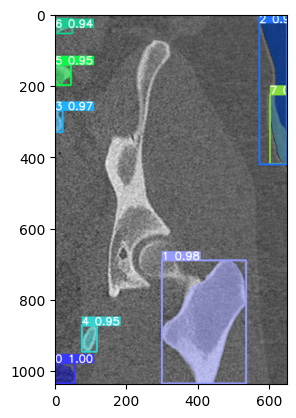

In [12]:
# Display model information (optional)
model.info()
img_path = '/home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/coronal_roi.png'

# Run inference
res = model(img_path)  # predict on an image

%matplotlib inline
res_plotted = res[0].plot()
plt.imshow(res_plotted)  # render results
plt.show()

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def most_round_segmentation(image, res, threshold_area=1000):
    # Extract segmentations
    segmentations = res[0].masks.xy
    
    # Calculate circularity for each segmentation and find the most round one
    max_circularity = -1
    most_round_segment = None
    for segment in segmentations:
        # Calculate area using contourArea
        area = cv2.contourArea(segment)
        if area < threshold_area:
            continue
        
        # Calculate perimeter using arcLength
        perimeter = cv2.arcLength(segment, True)
        
        # Calculate circularity
        circularity = 4 * np.pi * area / (perimeter**2)
        
        if circularity > max_circularity:
            max_circularity = circularity
            most_round_segment = segment  
    return most_round_segment

In [5]:
image = cv2.imread('/home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/axial_roi.png')
filtered_segmentation_obj = most_round_segmentation(image, res)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_segmentation(image_path, segmentation):
    """
    Plots an image with a given segmentation overlay.
    
    Parameters:
    - image_path: path to the image file.
    - segmentation: list of (x, y) coordinates for the segmentation.
    """

    # Load the image
    image = plt.imread(image_path)
    
    # Create a new figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Create a polygon patch from the segmentation
    polygon = patches.Polygon(segmentation, fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(polygon)

    # Display the image with segmentation overlay
    plt.show()

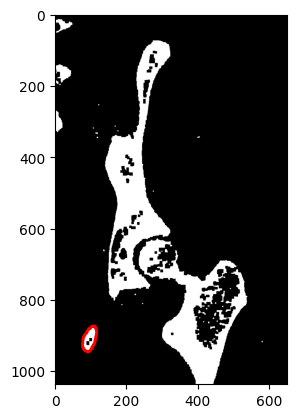

In [7]:
plot_image_with_segmentation(img_path, filtered_segmentation_obj)


image 1/1 /home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/axial_roi.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 3722.5ms
Speed: 3.2ms preprocess, 3722.5ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)


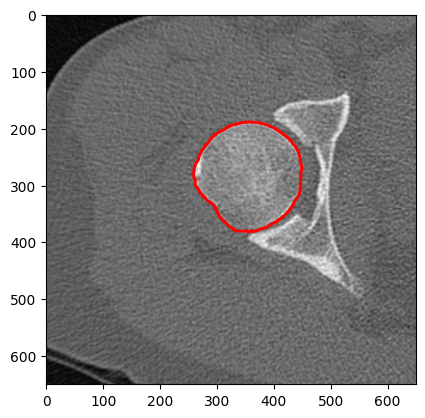

In [8]:
img_path = '/home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/axial_roi.png'
res = model(img_path)  # predict on an image
image = cv2.imread(img_path)

filtered_segmentation_obj = most_round_segmentation(image, res)
plot_image_with_segmentation(img_path, filtered_segmentation_obj)

image 1/1 /home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/sagittal_roi.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 3707.0ms
Speed: 3.1ms preprocess, 3707.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


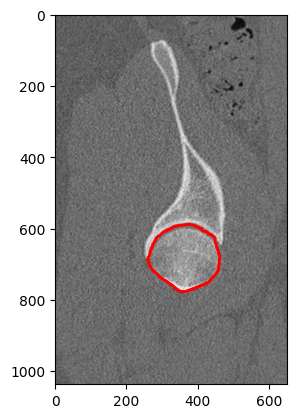

In [9]:
img_path = '/home/pappol/Scrivania/uni/medical/FemoralHeadSegmentation/img/sagittal_roi.png'
image = cv2.imread(img_path)
res = model(img_path)  # predict on an image

filtered_segmentation_obj = most_round_segmentation(image, res)
plot_image_with_segmentation(img_path, filtered_segmentation_obj)